In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import sklearn as sk

In [14]:
color_palette = sns.color_palette("Set3")
color_palette

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [79]:
signal_df = pd.DataFrame({
    "time": np.arange(record.sig_len) / record.fs,
    "resp": record.p_signal[:, 0],
})

signal_df

,time,resp
0,0.000,-0.260870
1,0.004,-0.266667
2,0.008,-0.260870
3,0.012,-0.271014
4,0.016,-0.265217
...,...,...
1799995,7199.980,0.392754
1799996,7199.984,0.401449
1799997,7199.988,0.382609
1799998,7199.992,0.381159


In [90]:
# Calculate samples per 30 seconds
samples_per_30_sec = int(30 * record.fs)

# Prepare data for DataFrame
data = []
for i, sample_index in enumerate(annotation.sample):
    start = sample_index
    end = start + samples_per_30_sec

    # If end exceeds the signal length, truncate the segment
    if end > record.sig_len:
        end = record.sig_len

    # Extract the segment
    segment = record.p_signal[start:end, 0]  # Assuming first channel

    # If the segment is shorter than 30 seconds, pad with NaN
    if len(segment) < samples_per_30_sec:
        segment = np.pad(segment, (0, samples_per_30_sec - len(segment)), 'constant', constant_values=np.nan)

    # Append segment and label to the data list
    segment_data = np.append(segment, annotation.aux_note[i])
    data.append(segment_data)

# Create a DataFrame
column_names = [f'Sample_{i}' for i in range(samples_per_30_sec)] + ['Label']
segment_df = pd.DataFrame(data, columns=column_names)

segment_df

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_7491,Sample_7492,Sample_7493,Sample_7494,Sample_7495,Sample_7496,Sample_7497,Sample_7498,Sample_7499,Label
0,-0.26666666666666666,-0.2608695652173913,-0.2710144927536232,-0.26521739130434785,-0.27246376811594203,-0.2797101449275362,-0.2971014492753623,-0.2971014492753623,-0.3072463768115942,-0.3072463768115942,...,0.17246376811594202,0.17681159420289855,0.16231884057971013,0.1565217391304348,0.1492753623188406,0.1463768115942029,0.14202898550724638,0.14347826086956522,0.14782608695652175,2
1,0.14782608695652175,0.15217391304347827,0.1536231884057971,0.16231884057971013,0.15797101449275364,0.16376811594202897,0.1463768115942029,0.14347826086956522,0.12608695652173912,0.13043478260869565,...,0.23623188405797102,0.23333333333333334,0.22608695652173913,0.23043478260869565,0.21884057971014492,0.23768115942028986,0.23043478260869565,0.2463768115942029,0.2492753623188406,2
2,0.2391304347826087,0.23768115942028986,0.22028985507246376,0.2217391304347826,0.21304347826086956,0.21014492753623187,0.2028985507246377,0.2028985507246377,0.21014492753623187,0.22028985507246376,...,0.33768115942028987,0.3115942028985507,0.34492753623188405,0.3130434782608696,0.3347826086956522,0.3130434782608696,0.3144927536231884,0.2942028985507246,0.2855072463768116,2
3,0.2710144927536232,0.28405797101449276,0.27246376811594203,0.2797101449275362,0.2826086956521739,0.28405797101449276,0.2956521739130435,0.2927536231884058,0.2826086956521739,0.26521739130434785,...,0.4449275362318841,0.43768115942028984,0.41739130434782606,0.42318840579710143,0.4072463768115942,0.4057971014492754,0.39855072463768115,0.43043478260869567,0.43478260869565216,2
4,0.4463768115942029,0.427536231884058,0.43478260869565216,0.4463768115942029,0.41884057971014493,0.42318840579710143,0.4072463768115942,0.41739130434782606,0.4289855072463768,0.42318840579710143,...,0.2811594202898551,0.27246376811594203,0.2710144927536232,0.2753623188405797,0.26666666666666666,0.26811594202898553,0.2608695652173913,0.2797101449275362,0.2797101449275362,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1 CAA
356,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2
357,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2 L
358,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,2


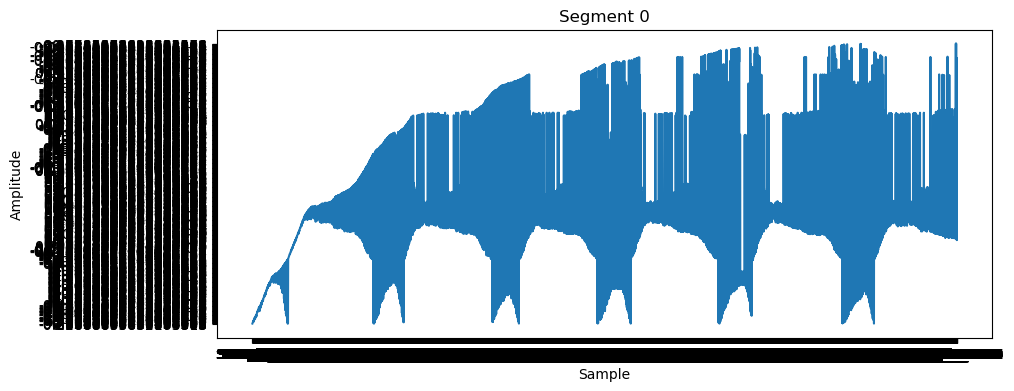

In [91]:
segment_index = 0
segment = segment_df.iloc[segment_index, :-1]  # Exclude the label column

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(segment)
plt.title(f'Segment {segment_index}')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [86]:
segment_df

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,...,Sample_7491,Sample_7492,Sample_7493,Sample_7494,Sample_7495,Sample_7496,Sample_7497,Sample_7498,Sample_7499,Label
0,-0.2608695652173913,-0.26666666666666666,-0.2608695652173913,-0.2710144927536232,-0.26521739130434785,-0.27246376811594203,-0.2797101449275362,-0.2971014492753623,-0.2971014492753623,-0.3072463768115942,...,0.1782608695652174,0.17246376811594202,0.17681159420289855,0.16231884057971013,0.1565217391304348,0.1492753623188406,0.1463768115942029,0.14202898550724638,0.14347826086956522,2
1,0.14782608695652175,0.15217391304347827,0.1536231884057971,0.16231884057971013,0.15797101449275364,0.16376811594202897,0.1463768115942029,0.14347826086956522,0.12608695652173912,0.13043478260869565,...,0.23623188405797102,0.23333333333333334,0.22608695652173913,0.23043478260869565,0.21884057971014492,0.23768115942028986,0.23043478260869565,0.2463768115942029,0.2492753623188406,2
2,0.2391304347826087,0.23768115942028986,0.22028985507246376,0.2217391304347826,0.21304347826086956,0.21014492753623187,0.2028985507246377,0.2028985507246377,0.21014492753623187,0.22028985507246376,...,0.33768115942028987,0.3115942028985507,0.34492753623188405,0.3130434782608696,0.3347826086956522,0.3130434782608696,0.3144927536231884,0.2942028985507246,0.2855072463768116,2
3,0.2710144927536232,0.28405797101449276,0.27246376811594203,0.2797101449275362,0.2826086956521739,0.28405797101449276,0.2956521739130435,0.2927536231884058,0.2826086956521739,0.26521739130434785,...,0.4449275362318841,0.43768115942028984,0.41739130434782606,0.42318840579710143,0.4072463768115942,0.4057971014492754,0.39855072463768115,0.43043478260869567,0.43478260869565216,2
4,0.4463768115942029,0.427536231884058,0.43478260869565216,0.4463768115942029,0.41884057971014493,0.42318840579710143,0.4072463768115942,0.41739130434782606,0.4289855072463768,0.42318840579710143,...,0.2811594202898551,0.27246376811594203,0.2710144927536232,0.2753623188405797,0.26666666666666666,0.26811594202898553,0.2608695652173913,0.2797101449275362,0.2797101449275362,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.463768115942029,1.472463768115942,1.4695652173913043,1.4739130434782608,1.4652173913043478,1.4652173913043478,1.4608695652173913,1.4594202898550726,1.4492753623188406,1.4579710144927536,...,-1.5014492753623188,-1.491304347826087,-1.4710144927536233,-1.4652173913043478,-1.4550724637681158,-1.444927536231884,-1.4391304347826086,-1.4405797101449276,-1.4376811594202898,W
236,-1.4420289855072463,-1.4304347826086956,-1.4173913043478261,-1.4057971014492754,-1.3811594202898552,-1.373913043478261,-1.3579710144927537,-1.3594202898550725,-1.344927536231884,-1.344927536231884,...,0.336231884057971,0.336231884057971,0.34347826086956523,0.32463768115942027,0.33043478260869563,0.32753623188405795,0.3217391304347826,0.3173913043478261,0.32753623188405795,1 H
237,0.3391304347826087,0.34782608695652173,0.33768115942028987,0.3333333333333333,0.34782608695652173,0.3391304347826087,0.33768115942028987,0.33043478260869563,0.32463768115942027,0.32318840579710145,...,0.6739130434782609,0.6971014492753623,0.6956521739130435,0.6956521739130435,0.6811594202898551,0.6971014492753623,0.6666666666666666,0.6797101449275362,0.6666666666666666,2
238,0.6623188405797101,0.6376811594202898,0.6579710144927536,0.6753623188405797,0.6927536231884058,0.6652173913043479,0.6652173913043479,0.6840579710144927,0.6884057971014492,0.6608695652173913,...,-1.036231884057971,-1.0318840579710145,-1.0347826086956522,-1.027536231884058,-1.0202898550724637,-1.0144927536231885,-0.9971014492753624,-0.9855072463768116,-0.9637681159420289,2


In [89]:
record.sig_len

1800000

In [88]:
len(annotation.aux_note)

360

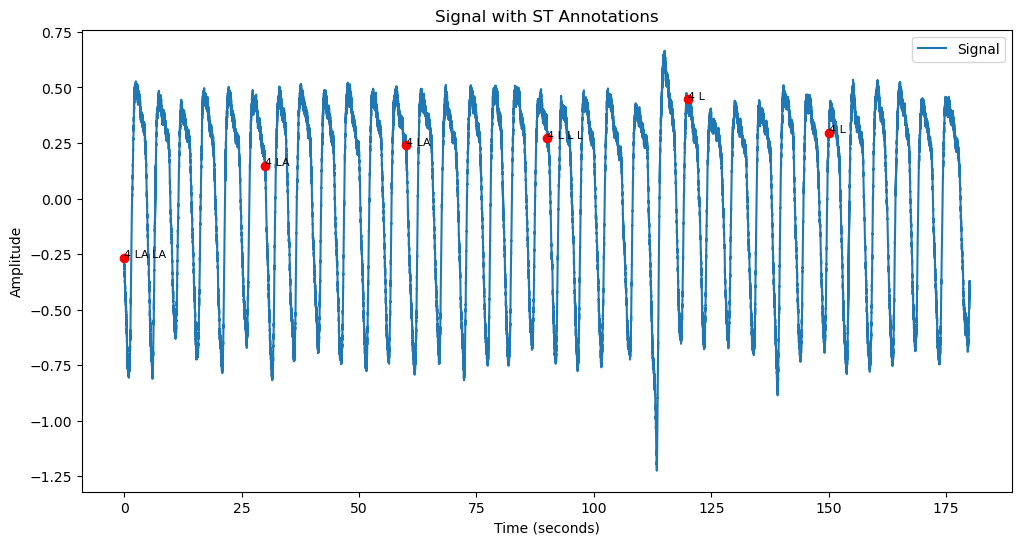

In [77]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
data_loc = "data/mit_bih_psg/"
# Load the record
record = wfdb.rdrecord(data_loc + 'slp01a', channel_names=["Resp (sum)"])

# Load the annotations
annotation_st = wfdb.rdann(data_loc + 'slp01a', 'st')
annotation_ecg = wfdb.rdann(data_loc + 'slp01a', 'ecg')

# Create a time array for the entire signal
num_samples = record.p_signal.shape[0]
time = np.arange(num_samples) / record.fs

# Select a single channel for plotting (e.g., the first channel)
signal_channel = record.p_signal[:, 0] if record.p_signal.ndim > 1 else record.p_signal

# Restrict the plot to the first 180 seconds
max_time = 180  # seconds
max_sample = int(max_time * record.fs)  # corresponding max sample index

# Filtering data to first 180 seconds
time_filtered = time[:max_sample]
signal_filtered = signal_channel[:max_sample]

# Filtering annotations to first 180 seconds
st_indices = annotation_st.sample[annotation_st.sample < max_sample]
ecg_indices = annotation_ecg.sample[annotation_ecg.sample < max_sample]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_filtered, signal_filtered, label='Signal')

# Plot and label ST annotations
for idx, sample in enumerate(st_indices):
    plt.plot(sample / record.fs, signal_filtered[sample], 'ro')
    if annotation_st.aux_note[idx]:  # Check if aux_note is not empty
        plt.text(sample / record.fs, signal_filtered[sample], annotation_st.aux_note[idx], fontsize=8)

# plt.plot(annotation_st.sample / record.fs, signal_channel[annotation_st.sample], 'ro', label='ST Annotations')
# plt.plot(annotation_ecg.sample / record.fs, signal_channel[annotation_ecg.sample], 'bo', label='ECG Annotations')
# for idx, sample in enumerate(annotation_st.sample):
#     plt.plot(sample / record.fs, signal_channel[sample], 'ro')
#     if annotation_st.aux_note[idx]:  # Check if aux_note is not empty
#         plt.text(sample / record.fs, signal_channel[sample], annotation_st.aux_note[idx], fontsize=8)

# plt.xlim(0, 30)
plt.title('Signal with ST Annotations')
plt.xlabel('Time (seconds)')
# plt.ylim(-1, 1)
plt.ylabel('Amplitude')
plt.legend()
plt.show()


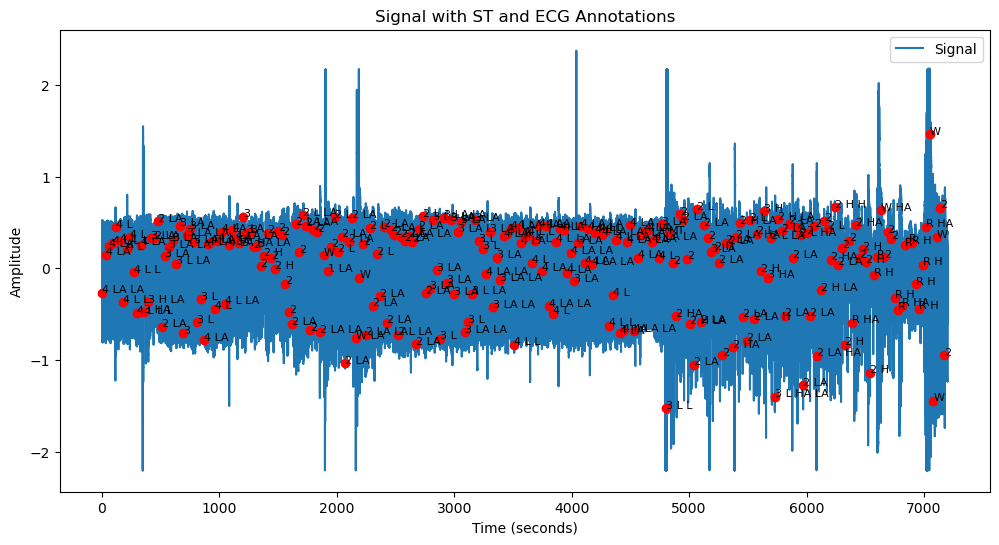

In [92]:
num_samples = record.p_signal.shape[0]
time = np.arange(num_samples) / record.fs

# Select a single channel for plotting
signal_channel = record.p_signal[:, 0] if record.p_signal.ndim > 1 else record.p_signal

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, signal_channel, label='Signal')

# Plot and label ST annotations
for idx, sample in enumerate(annotation_st.sample):
    plt.plot(sample / record.fs, signal_channel[sample], 'ro')
    if annotation_st.aux_note[idx]:  # Check if aux_note is not empty
        plt.text(sample / record.fs, signal_channel[sample], annotation_st.aux_note[idx], fontsize=8)


plt.title('Signal with ST and ECG Annotations')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()

['Resp (sum)']
Record dict {'record_name': 'slp01b', 'n_sig': 1, 'fs': 250, 'counter_freq': 0.033333333, 'base_counter': 448.0, 'sig_len': 2700000, 'base_time': datetime.time(2, 14), 'base_date': datetime.date(1989, 1, 20), 'comments': ['44 M 89 32-01-89'], 'sig_name': ['Resp (sum)'], 'p_signal': array([[-0.39565217],
       [-0.39275362],
       [-0.4       ],
       ...,
       [ 0.13188406],
       [ 0.14347826],
       [ 0.1173913 ]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['slp01b.dat'], 'fmt': ['212'], 'samps_per_frame': [1], 'skew': [None], 'byte_offset': [None], 'adc_gain': [-690.0], 'baseline': [0], 'units': ['l'], 'adc_res': [12], 'adc_zero': [0], 'init_value': [273], 'checksum': [51922], 'block_size': [0]}


ValueError: x and y must have same first dimension, but have shapes (1,) and (2700000, 1)

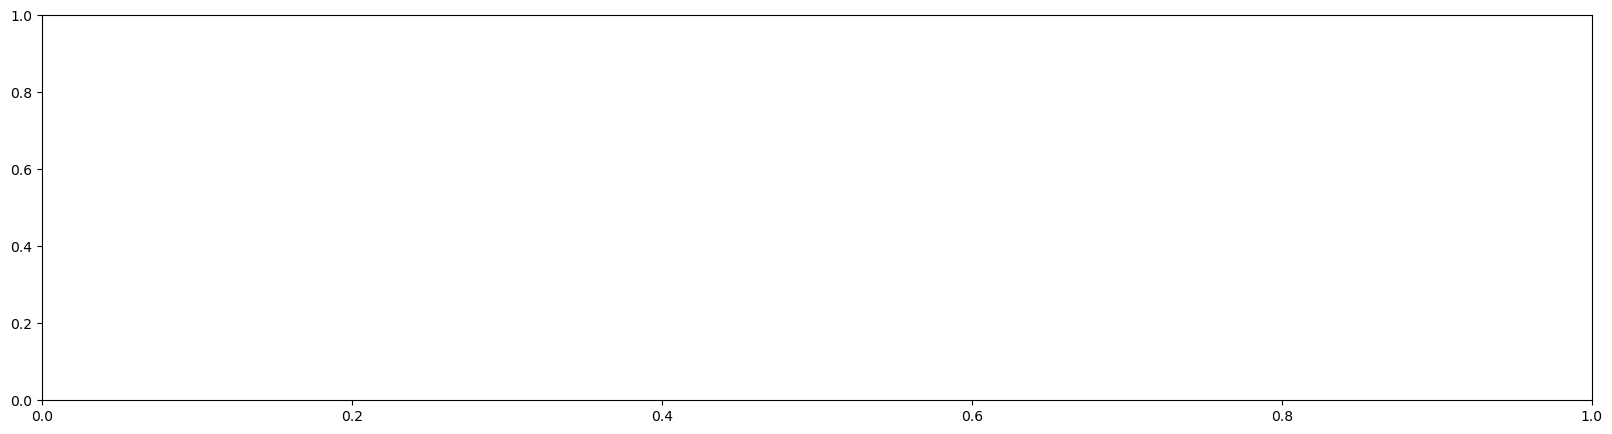

In [67]:
# read using wfdb from data 

data_loc = "data/mit_bih_psg/"

# read the data

record = wfdb.rdrecord(data_loc + "slp01b", channel_names=["Resp (sum)"])
# print channel names
print(record.sig_name)

# read the annotation
annotation = wfdb.rdann(data_loc + "slp01b", "st", )

time = record.p_signal.shape[0]/record.fs
annotation_time = annotation.sample/record.fs
# plot the signal
print("Record dict", record.__dict__)
plt.figure(figsize=(20, 5))
plt.plot(time, record.p_signal)
plt.plot(annotation_time, record.p_signal[annotation.sample, 0], "ro")
plt.show()

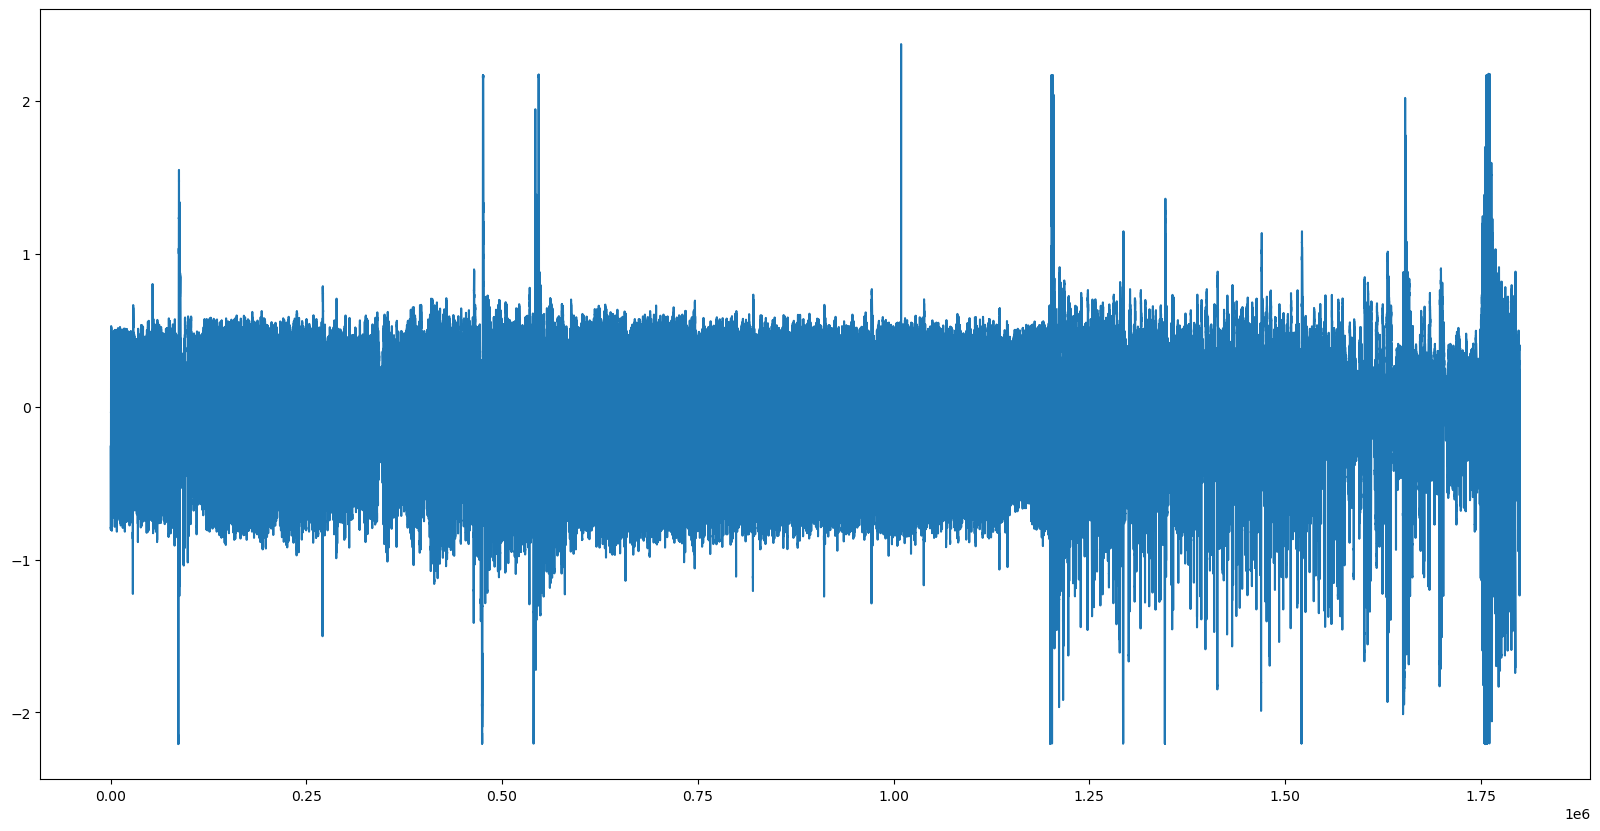

In [25]:
#check what is available in record
record.__dict__
# get 4th signal
record.p_signal[:, 3]

# plot 4th signal with annotation
plt.figure(figsize=(20, 10))
plt.plot(record.p_signal[:, 3])
# set y limit and x limit
# plt.ylim(-1, 1)
# plot the annotation
# plt.plot(annotation.sample, np.zeros(len(annotation.sample)), "ro")
plt.show()

In [26]:
annotation.__dict__

{'record_name': 'slp01a',
 'extension': 'st',
 'sample': array([      1,    7500,   15000,   22500,   30000,   37500,   45000,
          52500,   60000,   67500,   75000,   82500,   90000,   97500,
         105000,  112500,  120000,  127500,  135000,  142500,  150000,
         157500,  165000,  172500,  180000,  187500,  195000,  202500,
         210000,  217500,  225000,  232500,  240000,  247500,  255000,
         262500,  270000,  277500,  285000,  292500,  300000,  307500,
         315000,  322500,  330000,  337500,  345000,  352500,  360000,
         367500,  375000,  382500,  390000,  397500,  405000,  412500,
         420000,  427500,  435000,  442500,  450000,  457500,  465000,
         472500,  480000,  487500,  495000,  502500,  510000,  517500,
         525000,  532500,  540000,  547500,  555000,  562500,  570000,
         577500,  585000,  592500,  600000,  607500,  615000,  622500,
         630000,  637500,  645000,  652500,  660000,  667500,  675000,
         682500,  690

In [33]:
len(annotation.__dict__["sample"])

240

In [34]:
len(df["signal"])

1800000

<Axes: xlabel='time'>

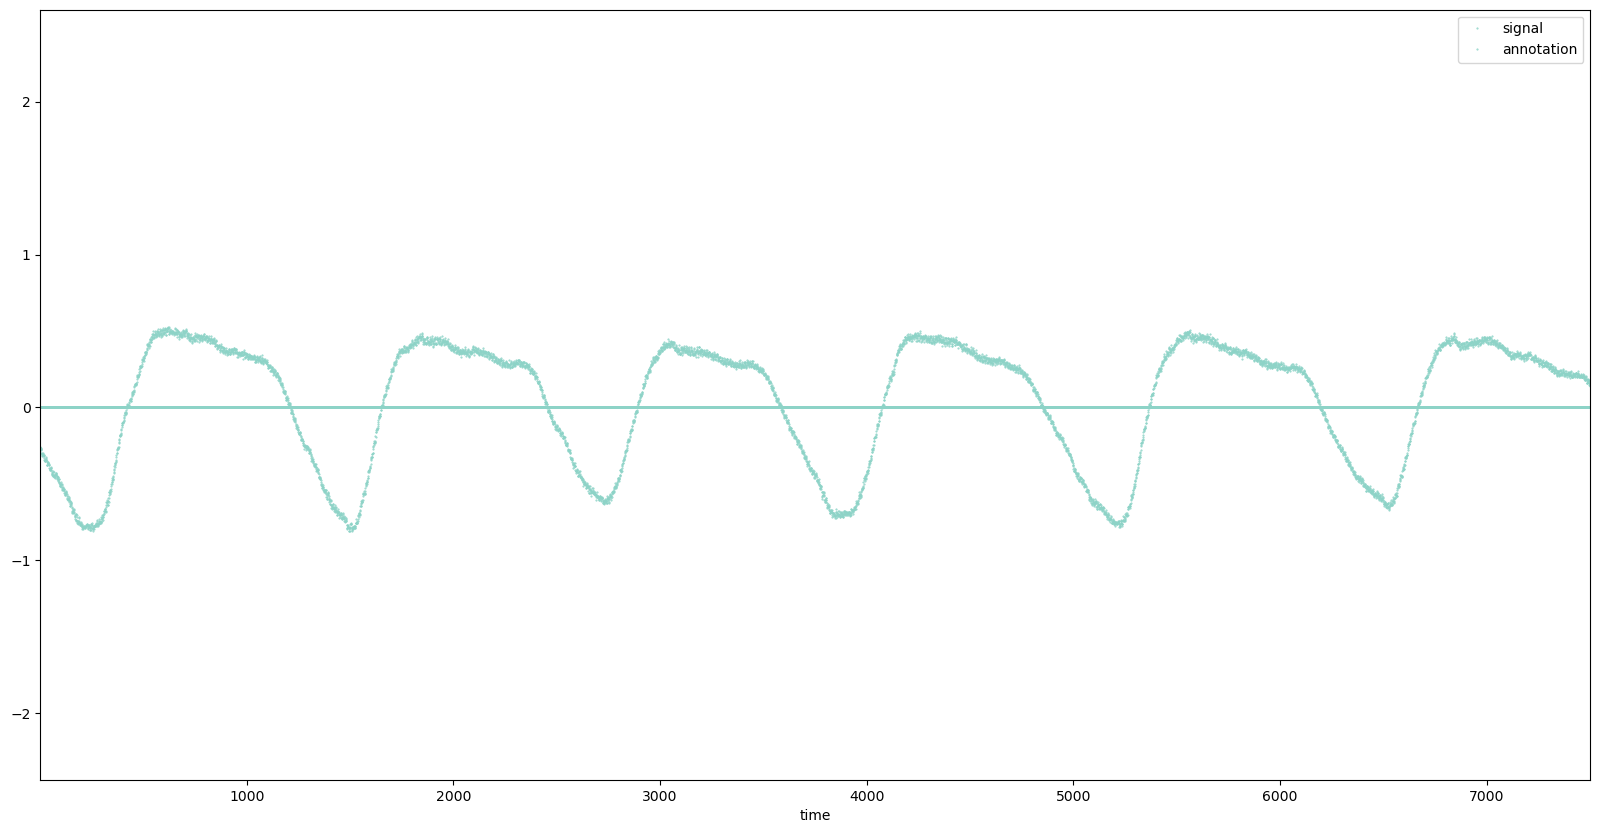

In [30]:
# create a dataframe with time, 4th signal and annotation
df = pd.DataFrame({"time": np.arange(len(record.p_signal[:, 3]))})
df["signal"] = record.p_signal[:, 3]
df["annotation"] = np.zeros(len(record.p_signal[:, 3]))


# set time to index 
df.set_index("time", inplace=True)

# each annotation is present for 7500 intervals of signal
# plot only first 7500 intervals
df.plot(style=".",
        ms=1,
        figsize=(20, 10),
        color=color_palette[0],
        xlim=(1, 7500))


In [54]:
annotation.__dict__.keys()

dict_keys(['record_name', 'extension', 'sample', 'symbol', 'subtype', 'chan', 'num', 'aux_note', 'fs', 'label_store', 'description', 'custom_labels', 'contained_labels', 'ann_len'])

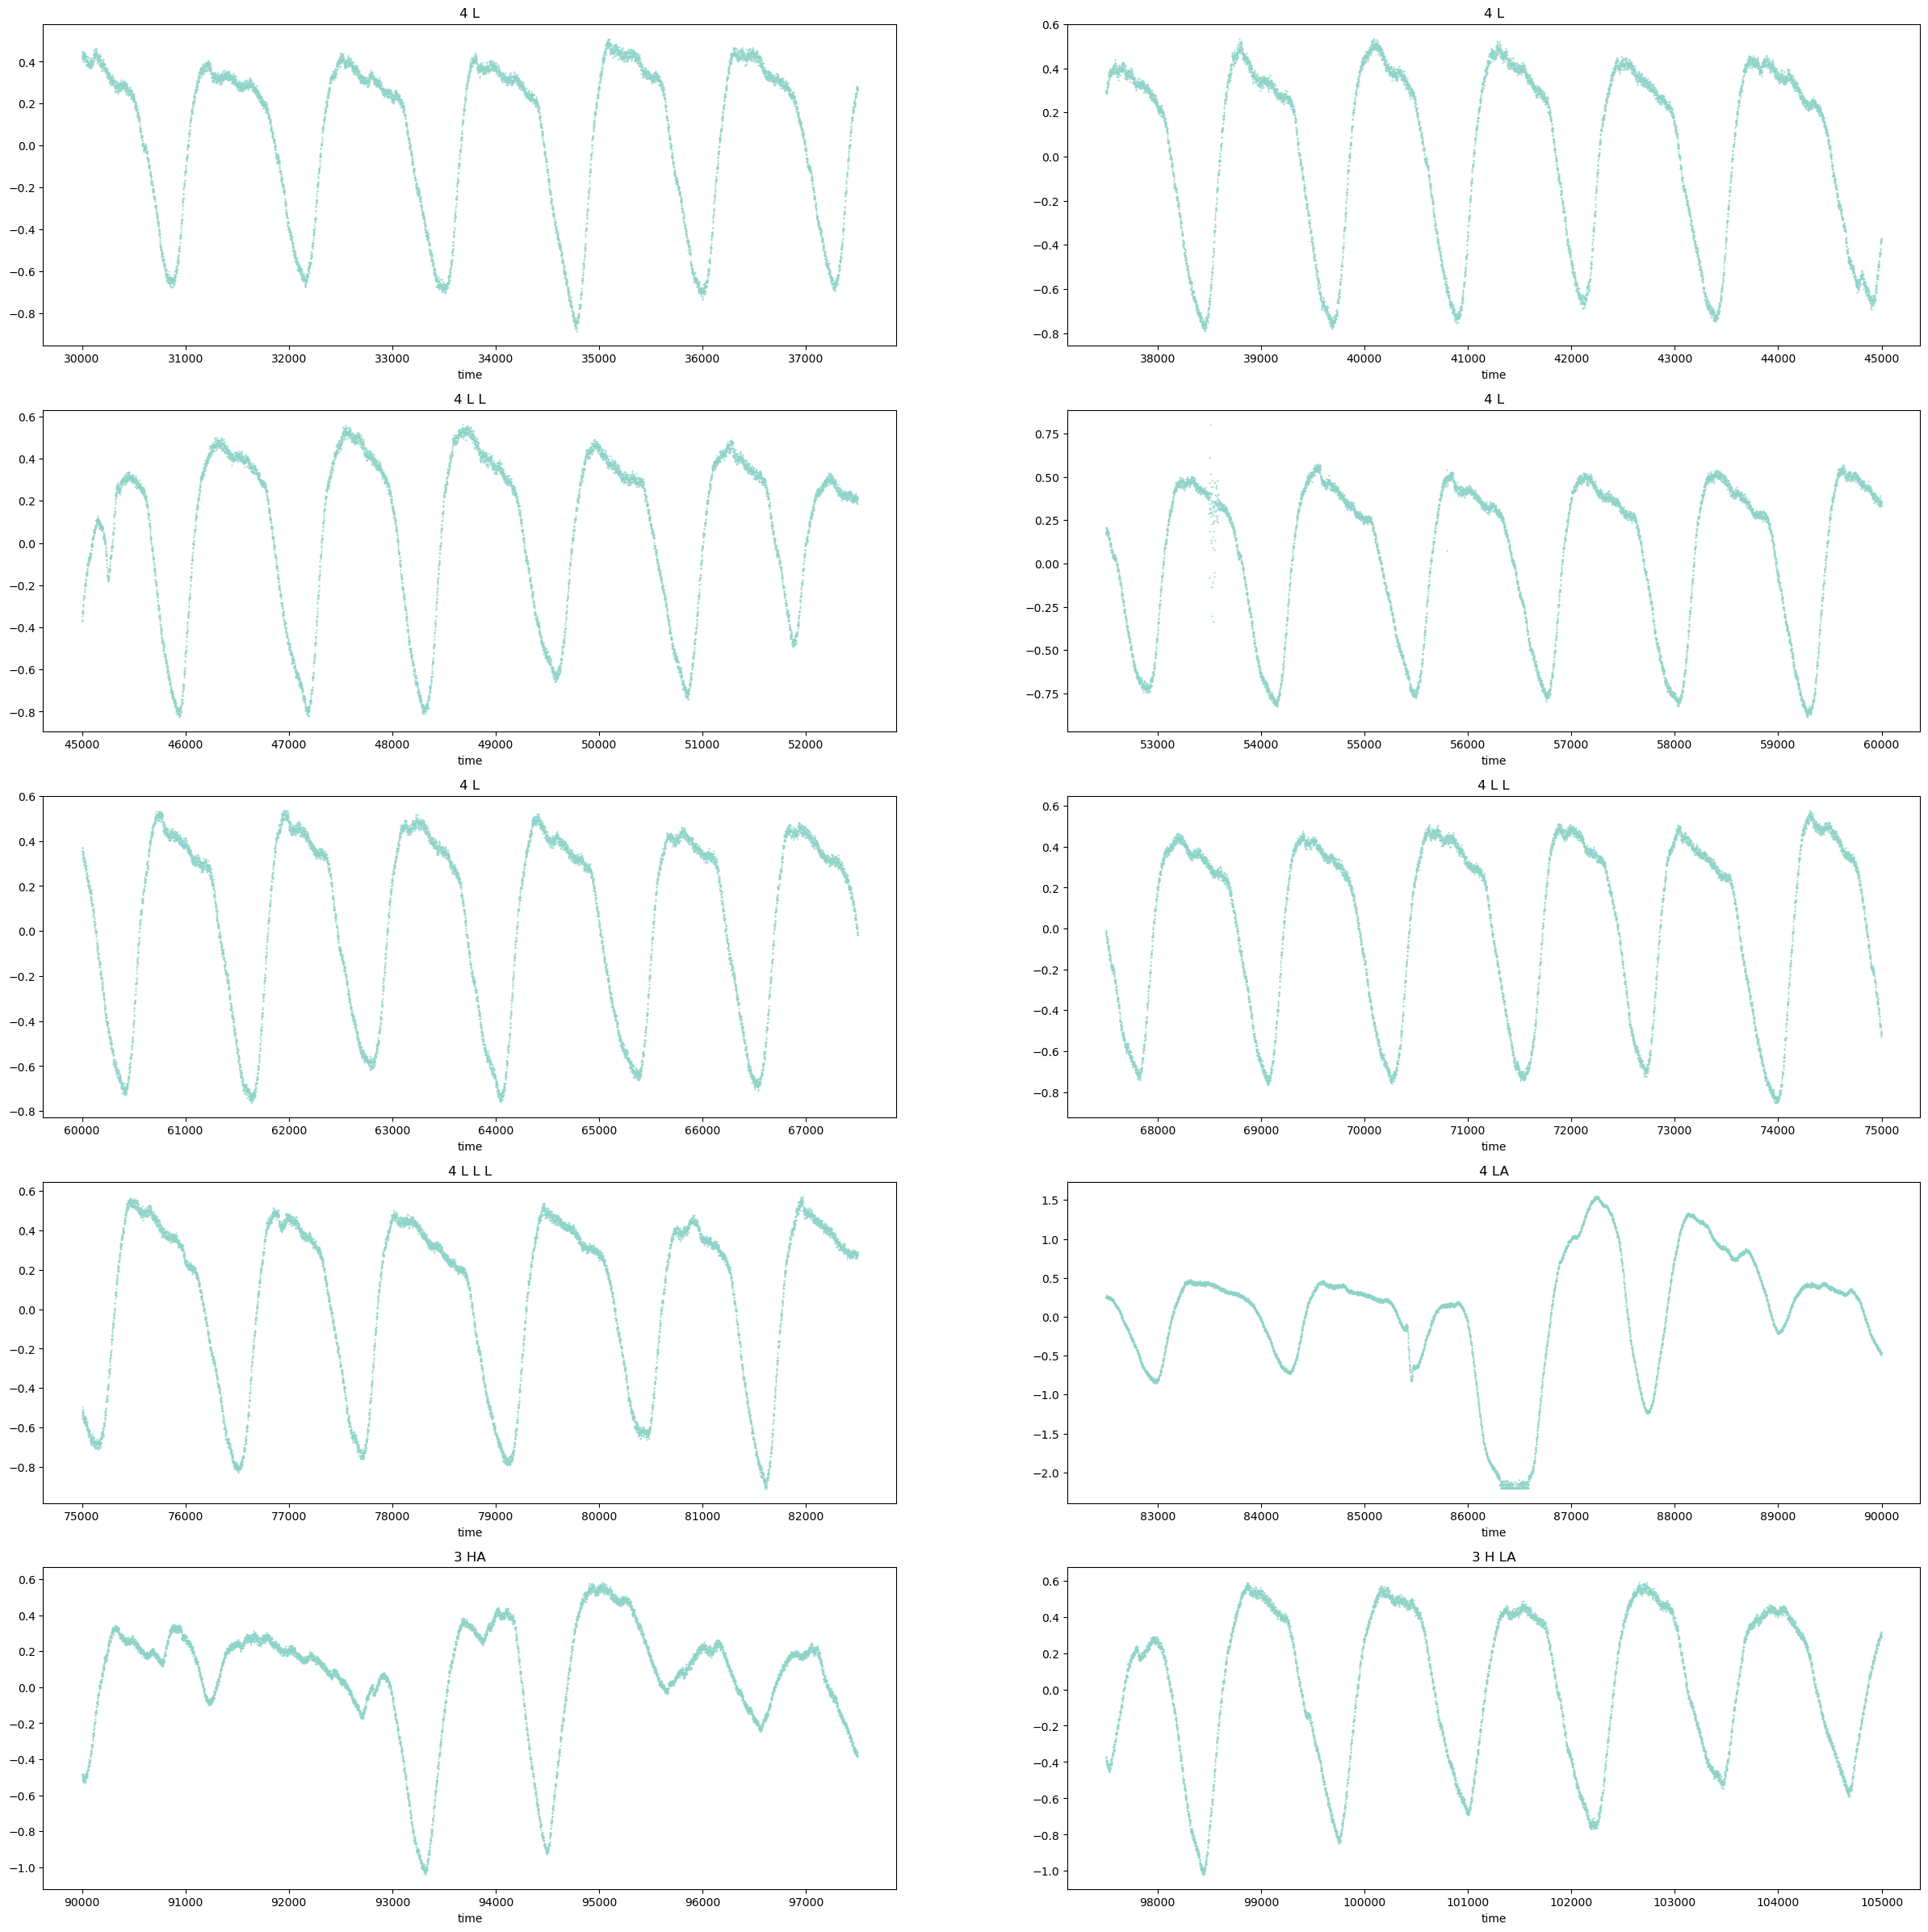

In [55]:
f, ax = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))


# plot 10 signals at 7500 intervals

start_x = 30000
for i in range(10):
    df["signal"].iloc[i * 7500 + start_x:(i + 1) * 7500+start_x].plot(
        style=".",
        ms=1,
        color=color_palette[0],
        ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title("signal " + str(i + 1))
    # get title from annotation
    title = annotation.__dict__["aux_note"][i+start_x//7500]
    # set title
    ax[i // 2, i % 2].set_title(title)